# Testing production and degradation on ABC

In [1]:
import pints
import pints.toy as toy
import pints.toy.stochastic
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

(100, 4)


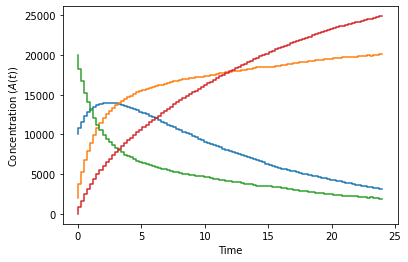

In [2]:
x_0 = [1e4, 2e3, 2e4, 0]
model = pints.toy.stochastic.MichaelisMentenModel(x_0)

times = np.linspace(0, 24, 100)
k = [1e-5, 0.2, 0.2]


values = model.simulate(k, times)
print(values.shape)
# print("s = (" + str(len(times)) + ", " + str(model.n_outputs()) + ")")
problem = pints.MultiOutputProblem(model, times, values)
error_measure = pints.MeanSquaredError(problem)

log_prior = pints.UniformLogPrior([5e-6, 0.05, 0.1], [2e-5, 0.3, 0.4])

plt.step(times, values)
plt.xlabel('Time')
plt.ylabel(r'Concentration ($A(t)$)')
plt.show()

# Rejection ABC

In [19]:
abc = pints.ABCController(error_measure, log_prior)

# set threshold
abc.sampler().set_threshold(2e6)

# set target number of samples
abc.set_n_samples(100)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using Rejection ABC
Running in sequential mode.
Iter. Eval. Acceptance rate Time m:s
1     5      0.2              0:03.2
2     10     0.2              0:07.2
3     11     0.272727273      0:07.9
20    87     0.229885057      1:02.1
40    246    0.162601626      2:52.2
60    355    0.169014084507   4:09.8
80    476    0.168067227      5:34.4
100   625    0.16             7:20.4
Halting: target number of samples (100) reached.
Done


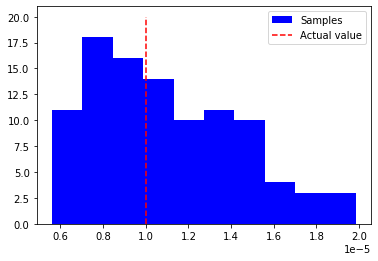

In [21]:
samples_flat = np.array([item for sublist in samples for item in sublist])

# print(samples_flat[:])
plt.hist(samples_flat[:,0], color="blue", label="Samples")
plt.vlines(x=1e-5, linestyles='dashed', ymin=0, ymax=20, label="Actual value", color="red")
plt.legend()
plt.show()

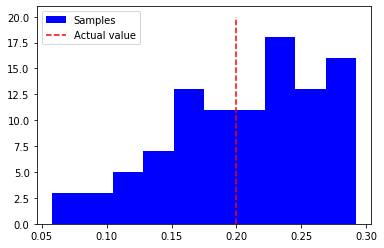

In [22]:
plt.hist(samples_flat[:,1], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=20, label="Actual value", color="red")
plt.legend()
plt.show()

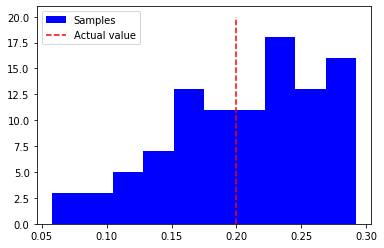

In [23]:
plt.hist(samples_flat[:,1], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=20, label="Actual value", color="red")
plt.legend()
plt.show()

# PMC

In [8]:
np.random.seed(3)

abc = pints.ABCController(error_measure, log_prior, method=pints.ABCPMC)

# set the threshold
abc.sampler().set_threshold(35)

# set target number of samples
# try this
abc.set_n_samples(500)

# setting the number of generations
abc.sampler().set_n_generations(10)

# setting the threshold ratio
abc.sampler().set_t_ratio(0.99)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using PMC ABC
Running in sequential mode.
Iter. Eval. Acceptance rate Time m:s
1     66251  0.00756215001   12:42.5
Halting: target number of samples (501) reached.
Done


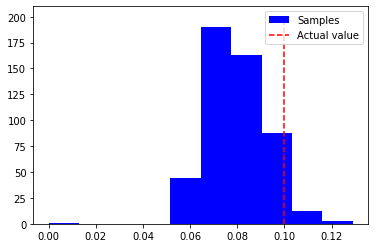

In [10]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=0.1, linestyles='dashed', ymin=0, ymax=200, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

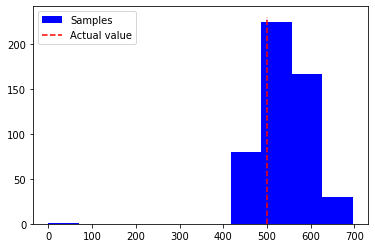

In [12]:
plt.hist(samples[:,1], color="blue", label="Samples")
plt.vlines(x=500, linestyles='dashed', ymin=0, ymax=230, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

# ABC SMC

In [3]:
np.random.seed(2)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)
# set initial threshold
abc.sampler().set_threshold_schedule(np.array([3e100, 2e100, 1e100]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(200)

# set target number of samples
abc.set_n_samples(5)

# log to screen
abc.set_log_to_screen(True)

samples = abc.run()
print("Done")

Using ABC-SMC
Running in sequential mode.
Trying t=1, threshold=2e+100


KeyboardInterrupt: 

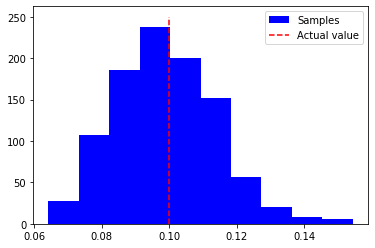

In [45]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=0.1, linestyles='dashed', ymin=0, ymax=250, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

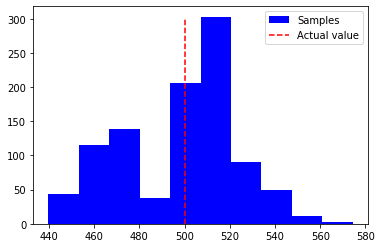

In [47]:
plt.hist(samples[:,1], color="blue", label="Samples")
plt.vlines(x=500, linestyles='dashed', ymin=0, ymax=300, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()